# Author : Ishika Banerjee

## GRIP @ The Sparks Foundation

## Data Science and Business Analytics Intern

### Batch : September, 2023

#### Task 1 : Prediction using Supervised Machine Learning

Predicting the percentage of marks that a student is expected to score based upon the number of hours studied using linear regression

Step 1 : Importing the required python libraries

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

Step 2: Importing the data from given external link

In [3]:
# Reading data from link
url = "http://bit.ly/w-data"
students_df= pd.read_csv(url)
print(students_df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


##### Data Exploration

Step 3: Explonatory Data Analysis


In [4]:
students_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
students_df.shape

(25, 2)

In [6]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
distinct_hours=students_df.Hours.nunique()
print("Number of unique values of study hours is:",distinct_hours)

Number of unique values of study hours is: 23


In [8]:
distinct_scores=students_df.Scores.nunique()
print("Number of unique values of spercentage of marks is:",distinct_scores)

Number of unique values of spercentage of marks is: 23


##### Checking for missing values

In [9]:
students_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Data Visualization

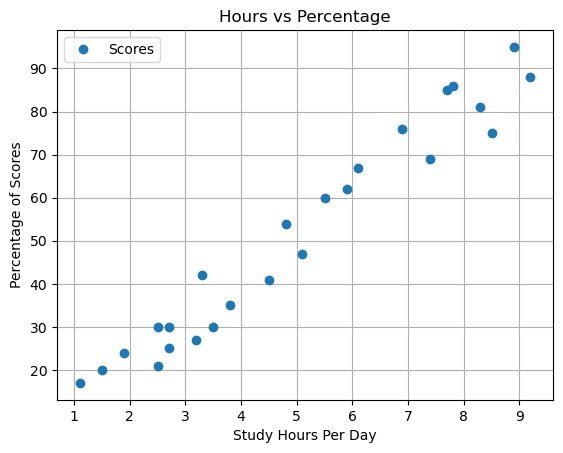

In [10]:
# Plotting the distribution of scores
students_df.plot(x='Hours', y='Scores',style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours Per Day')  
plt.ylabel('Percentage of Scores')  
plt.grid(True)
plt.show()

<Axes: xlabel='Hours'>

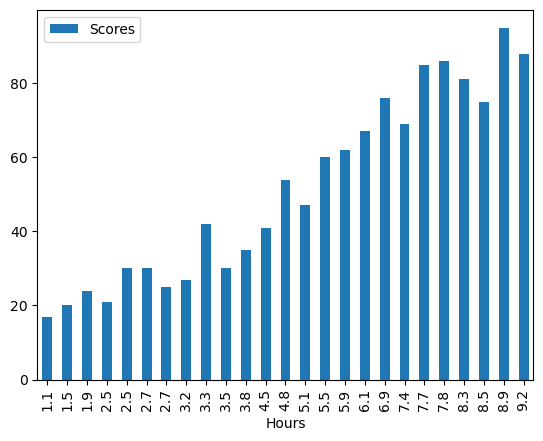

In [12]:
students_df.sort_values(['Hours'],axis=0,ascending=[True],inplace=True)
students_df.plot.bar(x='Hours',y='Scores')

##### Checking for outliers using boxplot

<Axes: >

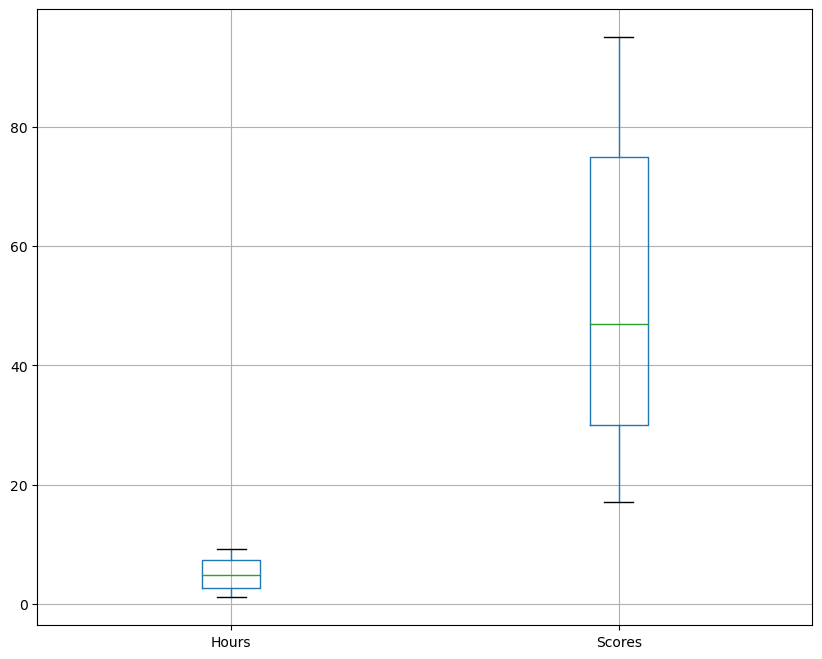

In [13]:
students_df.boxplot(figsize=(10,8))

Step 4: Data analysis and Model fitting

##### Train and Test Split

In [15]:
x = students_df.iloc[:, :-1].values  
y = students_df.iloc[:, 1].values 

In [16]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 


##### Training Alogorithm

In [17]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression()

##### Plotting the Regression Line

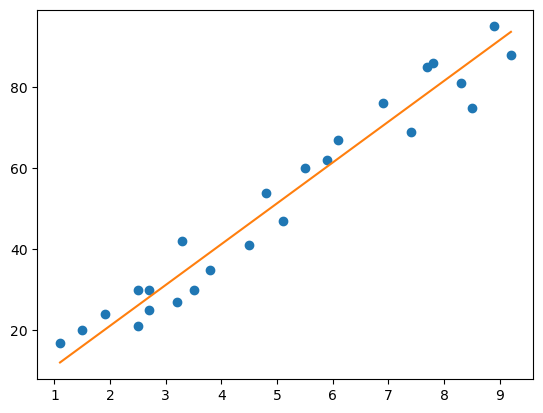

In [18]:
regression_line = model.coef_*x+model.intercept_

# Scatter plot and regression line
plt.plot(x, y, 'o')
plt.plot(x, regression_line);
plt.show()

##### Model testing and Prediction of Scores

In [19]:
# Testing data - In Hours
print(x_test)

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]
 [8.5]
 [6.9]
 [9.2]]


In [20]:
# Predicting the scores
y_predicted = model.predict(x_test)
print(y_predicted)

[28.22071832 20.16434745 78.57303627 62.46029453 46.34755278 86.62940714
 70.5166654  93.67873166]


In [21]:
# Comparing thr Actual vs Predicted Scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
print("The actual scores vs the predicted scores:\n",df)

The actual scores vs the predicted scores:
    Actual  Predicted
0      30  28.220718
1      24  20.164347
2      85  78.573036
3      67  62.460295
4      41  46.347553
5      75  86.629407
6      76  70.516665
7      88  93.678732


##### Checking model accuracy

In [22]:
model_accuracy_score= model.score(x_train,y_train)
print("The model accuracy is:",model_accuracy_score)

The model accuracy is: 0.9563763000236766


##### Predicting score of a student who studies for 9.25 hours/day

In [23]:
#Predicting with given value
hours = [[9.25]]
self_prediction = model.predict(hours)
print("The predicted score of student when the study hour is 9.25 hours is:",self_prediction)


The predicted score of student when the study hour is 9.25 hours is: [94.18225483]


##### Evaluating Model Performance

In [24]:
#Calculating the Root Mean Squared Error
from sklearn import metrics
import math
MSE= metrics.mean_squared_error(y_test,y_predicted)
RMSE= math.sqrt(MSE)
print("Root Mean Square Error:\n",RMSE)

Root Mean Square Error:
 6.184125293208643


In [25]:
#Calculating the Mean Absolute Error
print('Mean Absolute Error:\n',metrics.mean_absolute_error(y_test, y_predicted))

Mean Absolute Error:
 5.590078701239448


In [26]:
#Calculating the Mean Squared Error
print('Mean Squared Error:\n',metrics.mean_squared_error(y_test, y_predicted))

Mean Squared Error:
 38.243405642102886


In [27]:
#Calculating R^2 value
print('R^2:\n',metrics.r2_score(y_test, y_predicted))

R^2:
 0.9318830579679789


Value of R^2 signifies the fit of the model. Here, R^2= 0.9318830579679789 i.e. above is a good fit model.